# METHODES DE LA MOYENNE SIMPLE ET DE LA MOYENNE EXPONENTIELLE

In [1]:
!pip install yfinance
!pip install pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 36.9 MB/s eta 0:00:0000:0100:01
  Created wheel for peewee: filename=peewee-3.17.0-cp310-cp310-linux_x86_64.whl size=272558 sha256=3e62db13a038204c20ba9f55d94bd4d887e331c4aa15ad220e6d694816b11dd5
  Stored in directory: /home/onyxia/.cache/pip/wheels/c7/70/ad/212867e96e7004265a69c4aa5dcff00a95f547a67ba26e7e76
Successfully built peewee
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 7.5 MB/s eta 0:00:00


In [65]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
from matplotlib import gridspec

## ACTION APPLE

In [66]:
action_nom = 'AAPL'
data = yf.download(tickers=action_nom, start='2012-01-01', end='2023-01-29')
data.head(5)
#data.index

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449688,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516597,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655557,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787856,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767570,394024400


In [67]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2.786000e+03
mean,59.097241,59.764975,58.445941,59.130147,56.934889,2.027090e+08
std,48.186306,48.823108,47.570344,48.222542,48.547457,1.715400e+08
min,13.856071,14.271429,13.753571,13.947500,11.997525,3.519590e+07
25%,24.201251,24.419374,23.953660,24.191875,21.916797,9.454070e+07
50%,38.118750,38.481249,37.553751,38.187500,35.960211,1.384356e+08
75%,79.011877,79.794376,78.267500,79.205002,77.331486,2.465121e+08
max,182.630005,182.940002,179.119995,182.009995,179.953888,1.506120e+09


## MOYENNE MOBILE SIMPLE

## Description:
Ici on expérimente une méthode de prévision classique, très simple et assez basique. Il s'agit de la méthode de la moyenne mobile. L'idée ici est de se dire qu'on pourrait prédire les cours boursiers des jours à venir comme étant la moyenne de cours boursiers observées précédemment. Cela signifie que chaque valeur de la moyenne mobile est la moyenne des observations qui se trouvent dans la fenêtre à ce moment-là.

### Formule :  # à completer

In [85]:
# Paramètres initiaux
taille_fenetre = 100
N = len(data) # on prend la taille de l'echantillon, ou encore la longueur du dataframe
predictions_moyenne_mobile = [] # liste vide pour stocker les prédictions de la moyenne
dates_predictions = [] # liste vide pour stocker les dates correspondant aux prédictions
erreurs_mse = [] # liste vide pour stocker les erreurs quadratiques moyenne

# Boucle principale
# On commence à prendre un indice de valeur la taille de la fenetre, on commence par cette dernière parceque l'objectif est
# de regarder à chaque itération les 'taille_fenetre' valeurs précédentes. On mémorise ensuite la date correspondant à l'indice
# et ensuite on regarde la date de début donnant la fenetre. On fait ensuite la moyenne sur cette période et on calcule l'erreur 
# qudratique avec la vraie valeur prédite.

for pred_idx in range(taille_fenetre, N):
    date = data.index[pred_idx]  # Accéder à l'index comme date
    debut_fenetre = pred_idx - taille_fenetre
    fin_fenetre = pred_idx
    prediction = np.mean(data['Close'].iloc[debut_fenetre:fin_fenetre])

    predictions_moyenne_mobile.append(prediction)
    erreur = prediction - data['Close'].iloc[pred_idx]
    erreurs_mse.append(erreur ** 2)
    dates_predictions.append(date)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = 0.5 * np.mean(erreurs_mse)
print(f'Erreur MSE pour la moyenne mobile standard : {mse:.5f}')

Erreur MSE pour la moyenne mobile standard : 30.52410


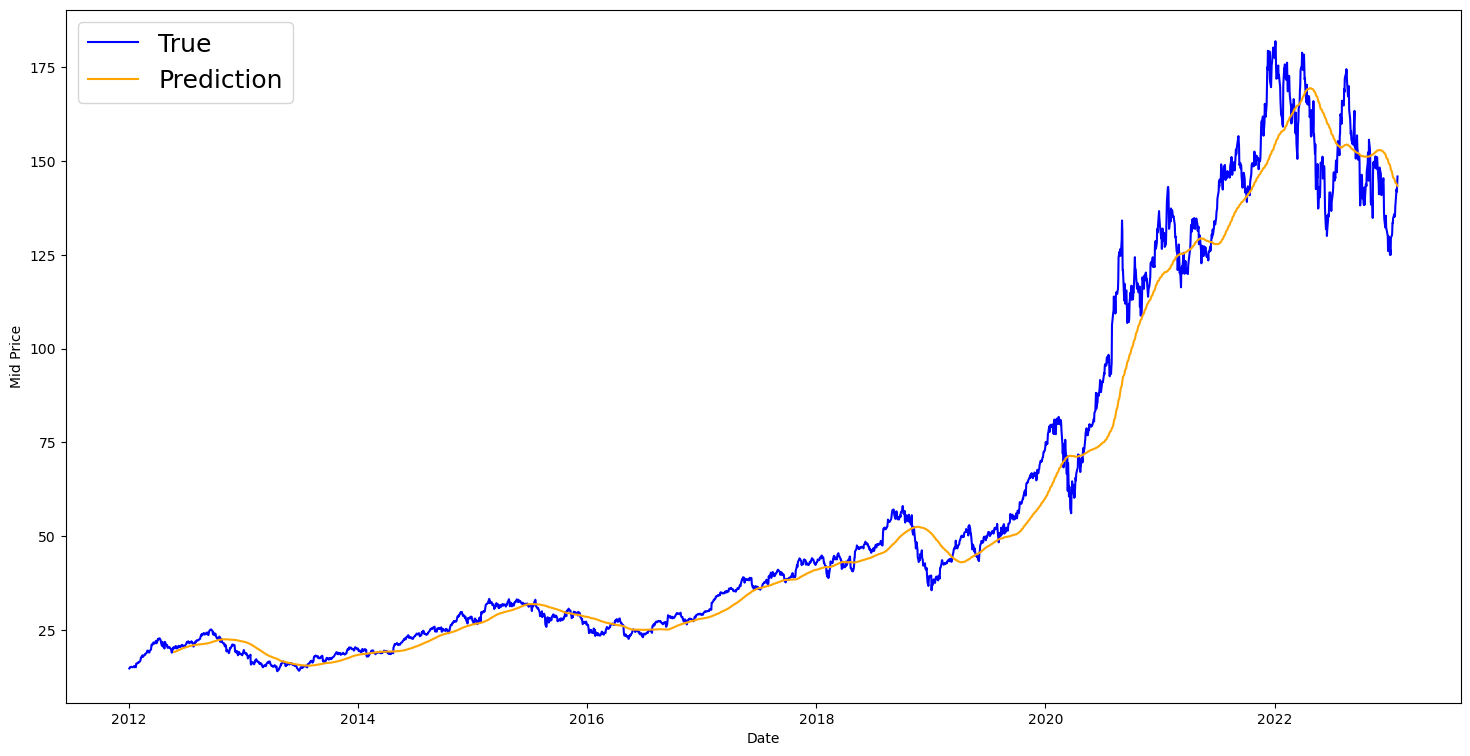

In [86]:
# Affichage des graphiques
plt.figure(figsize=(18, 9))
plt.plot(data.index, data['Close'], color='b', label='True')
plt.plot(data.index[taille_fenetre:], predictions_moyenne_mobile, color='orange', label='Prediction')
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

On observe ici que les résultats moyens suivent bien le cours de l'action Apple. Puisque les cours en bourse ne changent pas de 0 à 100 du jour au lendemain, ce comportement est raisonnable.

### Avantages : 
La moyenne mobile lisse les variations à court terme et met davantage l'accent sur les tendances à long terme. Elle est simple à comprendre et à calculer.

### Limites : 
Elle réagit lentement aux changements récents, car elle donne un poids égal à toutes les observations dans la fenêtre, indépendamment de leur distance temporelle par rapport à la date actuelle. Elle peut être retardée dans la détection des changements de tendance.



## MOYENNE MOBILE EXPONENTIELLE

## Description:
Nous allons appliquer ici une méthode similaire à la methode de la moyenne mobile simple dite de la moyenne mobile exponentielle. L'idée ici est de se dire que les jours précédents directement le jour dont on veut prédire la valeur de l'action la veille ou l'avant veille par exemple, ont une plus grande importance que les jours beaucoup plus éloignés. 
Une manière très interessante d'illustrer cette intuition est de donner aux jours de notre fenetre des poids différents en fonction de leurs 'proximité' au jour d'intérêt. Cela signifie qu'on attribue des poids décroissants aux observations à mesure qu'elles s'éloignent dans le temps. Cela est souvent formulé comme une combinaison pondérée exponentielle des observations précédentes.

In [88]:
# Paramètres initiaux
taille_fenetre = 100
alpha = 2 / (taille_fenetre + 1)  # Paramètre alpha pour la moyenne exponentielle
N = len(data)
predictions_ema = []
dates_predictions = []
erreurs_mse = []

# Initialisation de la moyenne exponentielle avec la première valeur
ema = data['Close'].iloc[:taille_fenetre].mean()

# Boucle principale
for pred_idx in range(taille_fenetre, N):
    date = data.index[pred_idx]  # Accéder à l'index comme date
    valeur_actuelle = data['Close'].iloc[pred_idx]

    # Calcul de la moyenne exponentielle
    ema = alpha * valeur_actuelle + (1 - alpha) * ema

    predictions_ema.append(ema)
    erreur = ema - valeur_actuelle
    erreurs_mse.append(erreur ** 2)
    dates_predictions.append(date)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = 0.5 * np.mean(erreurs_mse)
print(f'Erreur MSE pour la moyenne exponentielle mobile : {mse:.5f}')

# Création d'un DataFrame pour la visualisation
predictions_data = pd.DataFrame({'Date': dates_predictions, 'EMA_Prediction': predictions_ema})
predictions_data.set_index('Date', inplace=True)


Erreur MSE pour la moyenne exponentielle mobile : 23.66688


On remarque qu'on a un erreur plus faible avec le modele exponentielle pour une fenetre de 100 valeurs qu'avec le modele de moyenne simple!

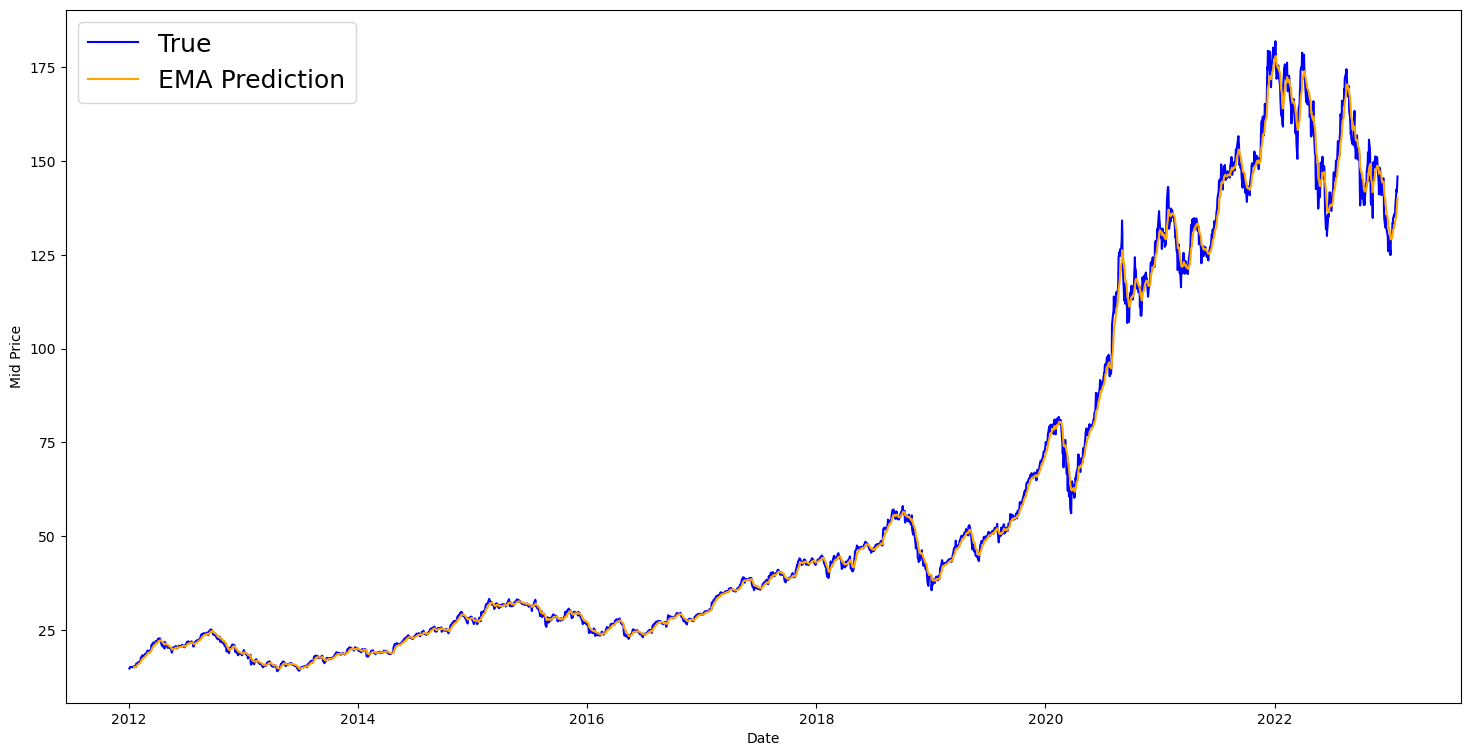

In [82]:
# Affichage des graphiques
plt.figure(figsize=(18, 9))
plt.plot(data.index, data['Close'], color='b', label='True')
plt.plot(predictions_data.index, predictions_data['EMA_Prediction'], color='orange', label='EMA Prediction')
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

### Si la moyenne exponentielle est si éfficace pourquoi n'est elle pas la plus utilisée? 

### Avantages : 
La moyenne mobile lisse les variations à court terme et met davantage l'accent sur les tendances à long terme. Elle est simple à comprendre et à calculer.

### Limites : 
Elle réagit lentement aux changements récents, car elle donne un poids égal à toutes les observations dans la fenêtre, indépendamment de leur distance temporelle par rapport à la date actuelle. Elle peut être retardée dans la détection des changements de tendance.

## Autres alternatives

En raison de ces limites, Ces modèles sont souvent utilisés comme des éléments d'une stratégie globale plutôt que comme des outils autonomes pour anticiper la volatilité. Les méthodes plus avancées, telles que les modèles GARCH (Generalized Autoregressive Conditional Heteroskedasticity), sont souvent préférées pour modéliser la volatilité, car elles sont conçues pour mieux capturer les propriétés dynamiques complexes des marchés financiers. Les modèles GARCH intègrent la dépendance conditionnelle et ajustent la volatilité en fonction des nouvelles informations disponibles, leur conférant plus de flexibilité et d'adaptabilité. Nous nous interesserons spécifiquement à cette méthode dans la suite du projet.